In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('vitamins_data.csv')
df.head(3)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,India,163819614,17.6,13.8
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6


In [3]:
df.drop(0,axis=0,inplace = True)

In [4]:
df.set_index([pd.Index(range(len(df)))], inplace = True)

In [5]:
df.head(2)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,Delhi,2016849,17.8,32.5
1,Haryana,3335537,26.1,27.6


In [6]:
df.describe()

,Population(0-6)years,VitA_deficit%,VitD_deficit%
count,3.000000e+01,28.000000,30.000000
mean,5.516359e+06,17.425000,15.860000
std,6.736190e+06,9.912343,13.488248
min,7.819500e+04,2.400000,1.100000
25%,5.492685e+05,9.550000,5.800000
50%,3.445226e+06,17.100000,12.300000
75%,7.458093e+06,21.925000,22.850000
max,3.162463e+07,43.200000,52.100000


In [7]:
df.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           2
VitD_deficit%           0
dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of the column VitD_deficit%')

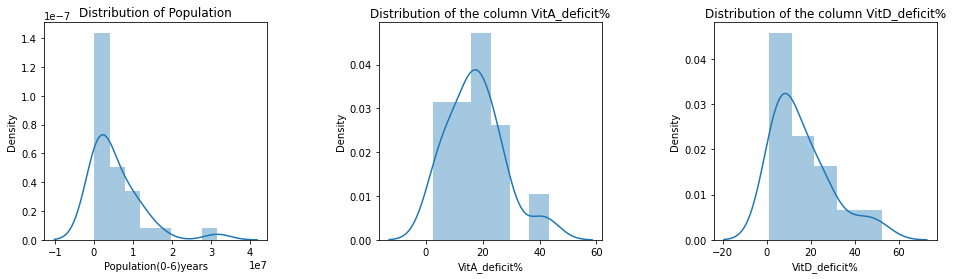

In [9]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
fig.subplots_adjust(wspace = 0.5)
sns.distplot(df['Population(0-6)years'], ax=ax[0]).set_title('Distribution of Population')
sns.distplot(df['VitA_deficit%'], ax=ax[1]).set_title('Distribution of the column VitA_deficit%')
sns.distplot(df['VitD_deficit%'], ax=ax[2]).set_title('Distribution of the column VitD_deficit%')

In [10]:
df['VitA_deficit%'].fillna(df['VitA_deficit%'].mean(), inplace = True)

In [11]:
df.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           0
VitD_deficit%           0
dtype: int64

In [12]:
df['VitA_deficit_total'] = df['VitA_deficit%'] * df['Population(0-6)years'] /100

In [13]:
df['VitD_deficit_total'] = df['VitD_deficit%'] * df['Population(0-6)years'] /100

In [14]:
df.head(2)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,VitA_deficit_total,VitD_deficit_total
0,Delhi,2016849,17.8,32.5,358999.122,655475.925
1,Haryana,3335537,26.1,27.6,870575.157,920608.212


<AxesSubplot:title={'center':'Percentage of deficiency of Vitamin A and Vitamin D'}, xlabel='State'>

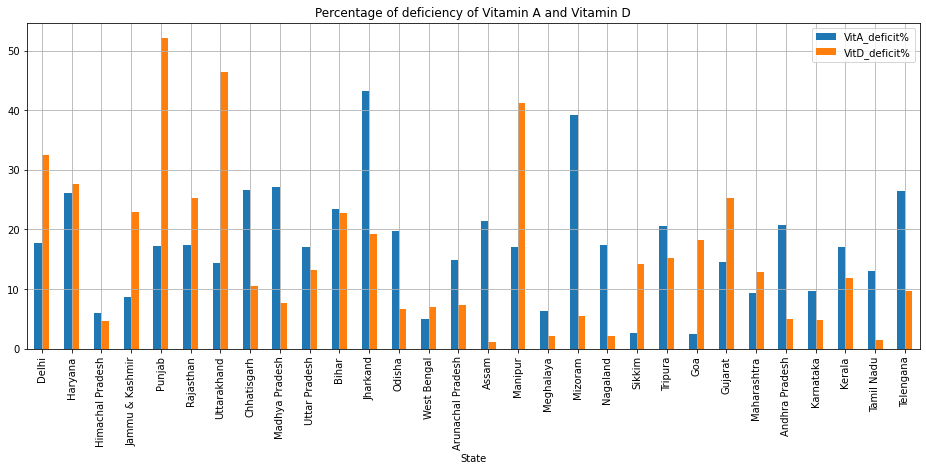

In [15]:
fig, ax= plt.subplots(figsize=(16,6))
df.plot(x= 'State', y =['VitA_deficit%', 'VitD_deficit%'], kind = 'bar',
        title ='Percentage of deficiency of Vitamin A and Vitamin D', grid=True,ax=ax)

<AxesSubplot:title={'center':'Total population deficiency of Vitamin A and Vitamin D'}, xlabel='State'>

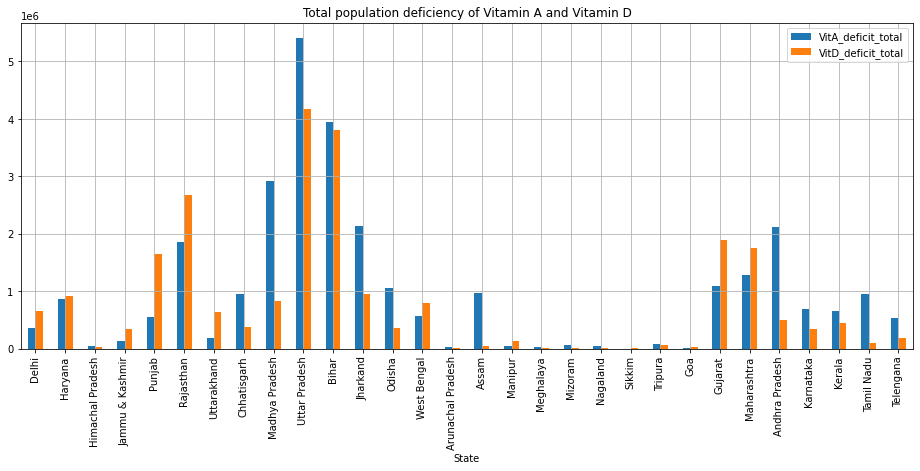

In [16]:
fig, ax= plt.subplots(figsize=(16,6))
df.plot(x= 'State', y =['VitA_deficit_total', 'VitD_deficit_total'], kind = 'bar',
        title ='Total population deficiency of Vitamin A and Vitamin D', grid=True,ax=ax)

In [17]:
data = pd.read_csv('data.csv')
data

,Characteristics,VitaminA_Deficit_percentage,VitaminD_Deficit_percentage
0,Gender_Male,20.6,17.4
1,Gender_Female,22.4,19.1
2,Diet_Veg,23.9,21.2
3,Diet_Veg_with_egg,18.5,15.3
4,Diet_non_veg,18.8,14.5
5,Area_Urban,22.2,27.8
6,Area_Rural,21.3,15.2


<AxesSubplot:ylabel='Characteristics'>

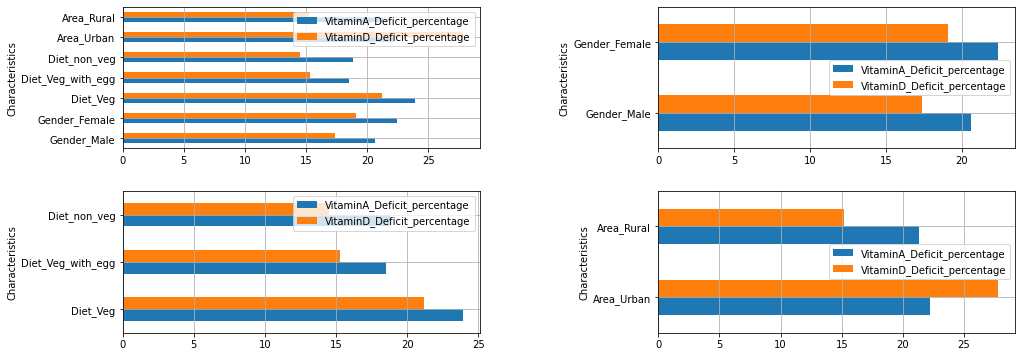

In [18]:
fig,ax = plt.subplots(2,2,figsize=(16,6))
fig.subplots_adjust(wspace = 0.5, hspace=0.3)
data.plot(x='Characteristics',y=['VitaminA_Deficit_percentage','VitaminD_Deficit_percentage'],
                    kind='barh',grid=True,ax=ax[0,0])
data.iloc[:2,:].plot(x='Characteristics',y=['VitaminA_Deficit_percentage','VitaminD_Deficit_percentage'],
                    kind='barh',grid=True, ax=ax[0,1])
data.iloc[2:5,:].plot(x='Characteristics',y=['VitaminA_Deficit_percentage','VitaminD_Deficit_percentage'],
                    kind='barh',grid=True, ax=ax[1,0])
data.iloc[5:,:].plot(x='Characteristics',y=['VitaminA_Deficit_percentage','VitaminD_Deficit_percentage'],
                    kind='barh',grid=True, ax=ax[1,1])

In [19]:
train = df[['VitA_deficit%','VitD_deficit%','VitA_deficit_total','VitD_deficit_total']]

In [20]:
sc= StandardScaler().fit(train)
train_std = sc.transform(train)

In [21]:
from sklearn.cluster import KMeans

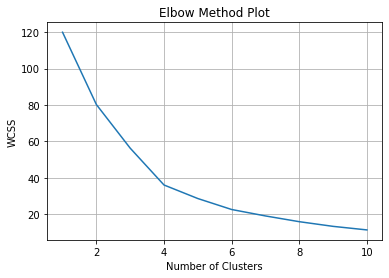

In [22]:
wcss =[]
#wcss = Within Cluster Sum of Squares
for i in range(1,11):
    kmns= KMeans(n_clusters = i, init = 'k-means++', random_state =23)
    kmns.fit(train_std)
    wcss.append(kmns.inertia_)
    
#Plotting to find the optimum number of clusters    
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

The silhouette score for no. of cluster k =  3  is :-  0.3390144574166799
The silhouette score for no. of cluster k =  4  is :-  0.3396809882591862
The silhouette score for no. of cluster k =  5  is :-  0.36173462627882186
The silhouette score for no. of cluster k =  6  is :-  0.3463507399737702


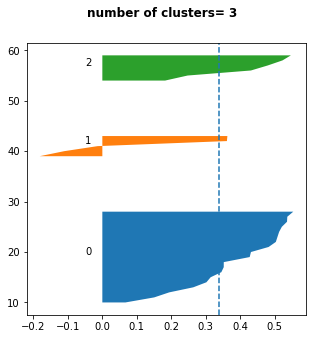

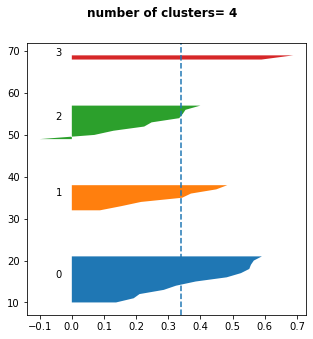

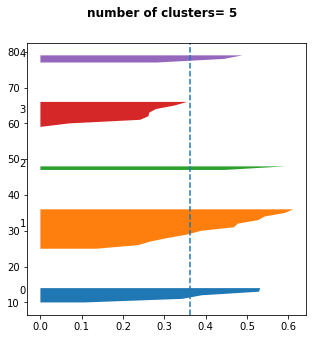

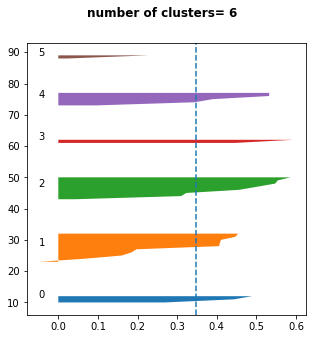

In [24]:
predict = []
for i in range(3,7):
    k = KMeans(n_clusters=i, random_state=23)
    pred= k.fit_predict(train_std)
    predict.append(pred)
    score =silhouette_score(train_std,pred)
    print('The silhouette score for no. of cluster k = ',i ,' is :- ', score)
    sil_sam = silhouette_samples(train_std,pred)
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    y_lower =10
    for j in range(i):
        jth_clus_sil_val = sil_sam[pred==j]
        jth_clus_sil_val.sort()
        j_size_clus = jth_clus_sil_val.shape[0]
        y_upper = y_lower + j_size_clus
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,jth_clus_sil_val)
        ax.text(-0.05,y_lower+0.5*j_size_clus, str(j))
        y_lower = y_upper + 10
    ax.axvline(x= score,linestyle= '--')
    plt.suptitle('number of clusters= %d' %i, fontweight= 'bold')

In [25]:
predict[2]

array([0, 0, 1, 1, 0, 4, 0, 3, 3, 2, 2, 3, 3, 1, 1, 3, 0, 1, 3, 1, 1, 1,
       1, 4, 4, 3, 1, 1, 1, 3])

In [26]:
df['Cluster'] = predict[2]

In [27]:
df.head(3)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,VitA_deficit_total,VitD_deficit_total,Cluster
0,Delhi,2016849,17.8,32.5,358999.122,655475.925,0
1,Haryana,3335537,26.1,27.6,870575.157,920608.212,0
2,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302,1


In [28]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]
df5 = df[df['Cluster']==4]

In [29]:
cluster1 = df1.State
cluster2 = df2.State
cluster3 = df3.State
cluster4 = df4.State
cluster5 = df5.State

print('States in Cluster1 are ', cluster1.to_numpy())

print('States in Cluster2 are ', cluster2.to_numpy())

print('States in Cluster3 are ', cluster3.to_numpy())

print('States in Cluster4 are ', cluster4.to_numpy())
print('States in Cluster5 are ', cluster5.to_numpy())

States in Cluster1 are  ['Delhi' 'Haryana' 'Punjab' 'Uttarakhand' 'Manipur']
States in Cluster2 are  ['Himachal Pradesh' 'Jammu & Kashmir' 'West Bengal' 'Arunachal Pradesh'
 'Meghalaya' 'Nagaland' 'Sikkim' 'Tripura' 'Goa' 'Karnataka' 'Kerala'
 'Tamil Nadu']
States in Cluster3 are  ['Uttar Pradesh' 'Bihar']
States in Cluster4 are  ['Chhatisgarh' 'Madhya Pradesh' 'Jharkand' 'Odisha' 'Assam' 'Mizoram'
 'Andhra Pradesh' 'Telengana']
States in Cluster5 are  ['Rajasthan' 'Gujarat' 'Maharashtra']
